# Problem Statement

# Project Summary

The Data science project which is given here is to predict the model for the insurance claim. The project goal is to predict the model which will help the insurance marketing team to know which customer will buy the product. The need for an accurate and efficient solution to the insurance marketing team for the customers to buy the product.

The given data has the 595212 data to perform a higher level machine learning where it is well structured. The features present in the data are 59 in total. The Shape of the data is 595212x59. The 59 features that belongs to similar groupings are tagged as ind, reg, car, calc, cat means categorical columns and bin means binary.

Due to privacy concerns, the company has not shared the names of the features. so EDA part is skipped as mentioned in the document and moving directly towards the modelling.

The dataset is a complete labelled data and categorical which decides the machine learning algorithm to be used.PCA technique should be used for feature extraction since this is large dataset.

The machine learning model which is used in this project is Logistic Regression and Random Forest Classifier which predicted the nearby higher accuracy of 96%. Since it is categorical labelled data, it has to go through the classifier machine learning techniques which will be suitable for this structured data.

# Importing Libraries

In [1]:
#Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [2]:
#Reading the data
ins = pd.read_csv("train.csv")
ins

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


# Understanding the Data

In [3]:
#Dimensions of the data
ins.shape

(595212, 59)

In [4]:
#dtypes of the data
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [5]:
#Summary Statistics
ins.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Based on understanding the data, we have 59 features. So we need to perform feature extraction to avoid complex model.
PCA technique will help to reducing dimensions and also it helps to addressing dimensionality curse.

# Data Preprocessing

PCA is effected by scale so we need to scale the features in the data before using PCA. we can transform the data onto unit scale (mean = 0 and variance = 1) for better performance. Scikit-Learn's StandardScaler helps standardize the dataset’s features.

In [6]:
#checking features
ins.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [7]:
#removing unwanted features
ins.drop(['id'],axis=1,inplace=True)
ins.columns

Index(['target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      

In [8]:
#Dimensions of the data
ins.shape

(595212, 58)

In [9]:
#Splitting the data before applying scale
X = ins.drop('target', axis =1)
X

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
1,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
2,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
3,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,3,1,10,0,0,0,0,0,1,0,...,4,1,9,6,0,1,1,0,1,1
595208,5,1,3,0,0,0,0,0,1,0,...,4,1,3,8,1,0,1,0,1,1
595209,1,1,10,0,0,1,0,0,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,5,2,3,1,0,0,0,1,0,0,...,4,1,4,2,0,1,1,1,0,0


In [10]:
#target data
y = ins[['target']]
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
595207,0
595208,0
595209,0
595210,0


In [11]:
#importing required library for preprocessing
from sklearn.preprocessing import StandardScaler

(array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 5.95212e+05, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 2.16000e+02, 5.94996e+05, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 8.35080e+04, 5.11704e+05, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 8.30000e+01, 5.95129e+05, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 5.80900e+03, 5.89403e+05, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 5.95212e+05, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 5.95212e+05, 0.00000e+00,
         0.00000e+00, 0.00000e+0

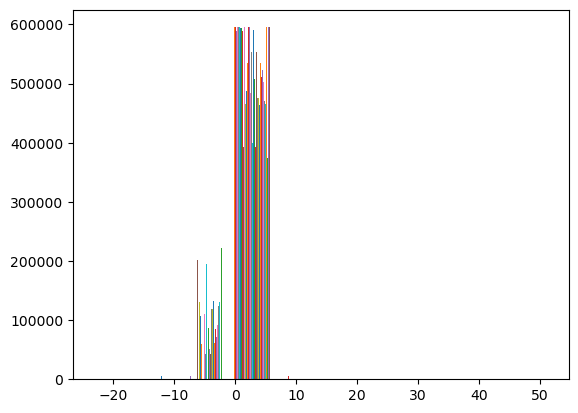

In [12]:
# Apply Standardization to features matrix X
scaler  = StandardScaler()
X_scaled =  scaler.fit_transform(X)
plt.hist(X_scaled)

# Splitting the Model for LogisticRegression

In [13]:
#importing required library for train_test_split 
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((476169, 57), (119043, 57), (476169, 1), (119043, 1))

# Model Selection for Raw Data

In [16]:
#importing required library for model selection
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Evaluating the model with raw data

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

#test the model --> we need to pass the input data
#predictions for trained model
pred = model.predict(X_train)
f1_score(y_train, pred, average = 'weighted')

0.945810646486122

In [19]:
#predictions for test model
pred_test = model.predict(X_test)
f1_score(y_test, pred_test, average = 'weighted')

0.9450924331269978

In [20]:
confusion_matrix(y_test, pred_test)

array([[114658,      0],
       [  4385,      0]])

In summary, a model with FP = 0 and TN = 0 might not be ideal, but its performance should be evaluated using additional metrics and in the context of our specific problem and its requirement is which customer will buy the product.

In [21]:
model.score(X_test, y_test)

0.9631645707853465

In [22]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114658
           1       0.00      0.00      0.00      4385

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



we are getting score as 96% in logistic regression using given features without scaling the data.

In [23]:
#Checking class balance
y.value_counts()

target
0         573518
1          21694
dtype: int64

This is highly imbalanced data. So we should balanced the data using class_weights technique.

# 1. Class_weights

Using class weights is a common and effective technique for handling highly imbalanced data in machine learning. Class weights help the model give more importance to the minority class during training, which can significantly improve the model's performance. 

# Using Class_weight parameter while creating model

In [24]:
model1 = LogisticRegression(class_weight='balanced')
model1.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [25]:
#evaluation for trained model
pred1 = model1.predict(X_train)
f1_score(y_train, pred1, average = 'weighted')

0.7394951768228155

In [26]:
#evaluation for test model
pred_test1 = model1.predict(X_test)
f1_score(y_test, pred_test1, average = 'weighted')

0.7379309939913605

In [27]:
print(classification_report(y_test, pred_test1))

              precision    recall  f1-score   support

           0       0.97      0.63      0.76    114658
           1       0.05      0.55      0.10      4385

    accuracy                           0.62    119043
   macro avg       0.51      0.59      0.43    119043
weighted avg       0.94      0.62      0.74    119043



In [28]:
accuracy_score(y_test, pred_test1)

0.6238418050620365

After using class_weights technique, we got an accuracy score is 62%

# Splitting the data for Scaled data

In [29]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

# Model Selection for Logistic regression with Scaled data

In [30]:
model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

# Evaluating the model with scaled data

In [31]:
#test the model --> we need to pass the input data
#evaluation for train model
pred_scaled = model_scaled.predict(X_train_scaled)
f1_score(y_train, pred_scaled, average = 'weighted')

0.945810646486122

In [32]:
#evaluation for test model
pred_test_scaled = model_scaled.predict(X_test_scaled)
f1_score(y_test, pred_test_scaled, average = 'weighted')

0.9450924331269978

In [33]:
confusion_matrix(y_test, pred_test_scaled)

array([[114658,      0],
       [  4385,      0]])

In [34]:
model_scaled.score(X_test_scaled, y_test)

0.9631645707853465

In [35]:
print(classification_report(y_test, pred_test_scaled))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114658
           1       0.00      0.00      0.00      4385

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



# PCA : Principal Compound Analysis

PCA is a technique widely used in machine learning to smartly reduce the dimensionality of large dataset while losing the least amount of information possible. One use of PCA is for data visualization. 

# PCA Projection to 2D

The original data has 57 columns. The code below projects the original data which is 57 dimensional into minimum dimensions. Note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are minimum dimensions of variation.

In [36]:
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

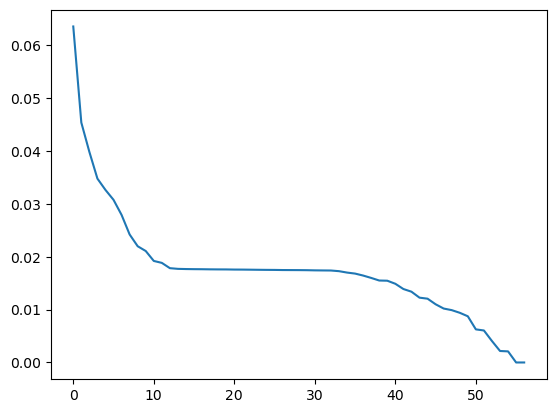

In [37]:
# Sets up the PCA object
pca = PCA()

# Transforms the training data ('tf' = 'transformed')
x = pca.fit_transform(X_scaled)

# Plot the variance explained by each component
plt.plot(pca.explained_variance_ratio_)

# PCA without Scaling

In [38]:
# Make an instance of PCA
pca = PCA(0.95)

# Fit and transform the data
X_pca = pca.fit_transform(X)
X_pca.shape


(595212, 4)

In [39]:
#The variance explained by each component
pca.explained_variance_ratio_

array([0.9077327 , 0.02542341, 0.01103373, 0.00702688])

In [40]:
sum(pca.explained_variance_ratio_)

0.9512167125146926

In [41]:
#Number of dimensions reduced from original dimensions
pca.n_components_

4

# Splitting data for PCA Components without scaling

In [42]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state=42)

# Model Selection for PCA Components without scaling

In [43]:
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)

LogisticRegression()

# Evaluating the model for PCA Components without scaling

In [44]:
model_pca.score(X_test_pca, y_test)

0.9631645707853465

In [45]:
#test the model --> we need to pass the input data
#predictions
pred_pca = model_pca.predict(X_test_pca)
pred_pca

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
accuracy_score(y_test, pred_pca)

0.9631645707853465

In [47]:
print(classification_report(y_test, pred_pca))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114658
           1       0.00      0.00      0.00      4385

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



# PCA after scaling

In [48]:
# Make an instance of PCA
pca = PCA(0.95)

# Fit and transform the data
X_pca1 = pca.fit_transform(X_scaled)
X_pca1.shape

(595212, 47)

In [49]:
#The variance explained by each component
pca.explained_variance_ratio_

array([0.06357069, 0.04538679, 0.03984   , 0.03478694, 0.03264271,
       0.0307718 , 0.02791877, 0.02421807, 0.02199152, 0.02108828,
       0.01921062, 0.01884288, 0.01784236, 0.0177124 , 0.01767554,
       0.01765483, 0.0176436 , 0.01762084, 0.0176088 , 0.01760316,
       0.01757921, 0.01757275, 0.01755553, 0.01753638, 0.01752075,
       0.01751152, 0.01748893, 0.01748191, 0.01747485, 0.01746037,
       0.01742863, 0.01741277, 0.01739953, 0.01727581, 0.01701004,
       0.01681827, 0.01644574, 0.01599565, 0.01550622, 0.0154695 ,
       0.01488993, 0.01389836, 0.01339226, 0.01226395, 0.01206943,
       0.01101275, 0.01020585])

In [50]:
sum(pca.explained_variance_ratio_)

0.9513074979197778

In [51]:
#Number of dimensions reduced from original dimensions
pca.n_components_

47

# Splitting data for PCA Components with scaling

In [52]:
X_train_pca1, X_test_pca1, y_train, y_test = train_test_split(X_pca1, y, test_size = 0.2, random_state=42)

#  Model Selection for PCA Components with scaling

In [53]:
model_pca1 = LogisticRegression()
model_pca1.fit(X_train_pca1, y_train)

LogisticRegression()

# Evaluating the model for PCA Components with scaling

In [54]:
model_pca1.score(X_test_pca1, y_test)

0.9631645707853465

In [55]:
#test the model --> we need to pass the input data
#predictions
pred_pca1 = model_pca1.predict(X_test_pca1)
pred_pca1

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
accuracy_score(y_test, pred_pca1)

0.9631645707853465

In [57]:
print(classification_report(y_test, pred_pca1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114658
           1       0.00      0.00      0.00      4385

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



After scaling the data using PCA components , we got accuracy score is 96%.

# Class_weights due to imbalanced data after PCA with scaled data

In [58]:
y.value_counts()

target
0         573518
1          21694
dtype: int64

Since our data is imbalanced data.So we need to balance the data using SMOTE technique.

In [60]:
model_smote = LogisticRegression(class_weight='balanced')
model_smote.fit(X_train_pca1,y_train)

LogisticRegression(class_weight='balanced')

In [61]:
pred_smote = model_smote.predict(X_train_pca1)
f1_score(y_train, pred_smote, average = 'weighted')

0.7396238401328811

In [62]:
pred_smote_test = model_smote.predict(X_test_pca1)
f1_score(y_test, pred_smote_test, average ='weighted')

0.7390173037400951

In [63]:
model_smote.score(X_test_pca1, y_test)

0.6252698604705863

In [64]:
print(classification_report(y_test, pred_smote_test))

              precision    recall  f1-score   support

           0       0.97      0.63      0.76    114658
           1       0.05      0.55      0.10      4385

    accuracy                           0.63    119043
   macro avg       0.51      0.59      0.43    119043
weighted avg       0.94      0.63      0.74    119043



# Oversampling

#  SMOTE to oversample due to the skewness in target variable

# SMOTE : Synthetic Minority Oversampling Technique

Since our dataset is imbalanced data. SMOTE is a data augmentation technique commonly used in machine learning to deal with imbalanced datatsets. It involves generating synthetic samples of the minority class by interpolating between
existing minority class samples.

In [65]:
# importing required library for balancing data
from imblearn.over_sampling import SMOTE

In [66]:
sm = SMOTE(random_state = 42)

In [67]:
#smote on train and test sets
X_train_smote, y_train_smote = sm.fit_resample(X_train_pca1, y_train)
X_test_smote, y_test_smote = sm.fit_resample(X_test_pca1, y_test)

In [68]:
X_train_pca1.shape, X_train_smote.shape, X_test_pca1.shape, X_test_smote.shape

((476169, 47), (917720, 47), (119043, 47), (229316, 47))

In [69]:
y_train.shape, y_train_smote.shape, y_test.shape, y_test_smote.shape

((476169, 1), (917720, 1), (119043, 1), (229316, 1))

# Model Selection

In [70]:
model_smote1 = LogisticRegression()
model_smote1.fit(X_train_smote, y_train_smote)

LogisticRegression()

# Evaluating the model for Smote

In [71]:
model_smote1.score(X_test_smote, y_test_smote)

0.585868408658794

In [72]:
#test the model --> we need to pass the input data
#predictions
pred_smote1 = model_smote1.predict(X_test_smote)
pred_smote1

array([0, 1, 0, ..., 0, 1, 1])

In [73]:
accuracy_score(y_test_smote, pred_smote1)

0.585868408658794

In [74]:
print(classification_report(y_test_smote, pred_smote1))

              precision    recall  f1-score   support

           0       0.58      0.61      0.59    114658
           1       0.59      0.57      0.58    114658

    accuracy                           0.59    229316
   macro avg       0.59      0.59      0.59    229316
weighted avg       0.59      0.59      0.59    229316



After using SMOTE technique, we got accuracy score is 59%.

# Random Forest Classifier

In [75]:
#importing required library for random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Model Seleciton for RFC

In [76]:
model_rf  =  RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=20, class_weight='balanced')

In [77]:
#trained the model
model_rf.fit(X_train_pca1, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=10)

# Evaluating the Model

In [78]:
y_train_pred_rf  = model_rf.predict(X_train_pca1)
y_test_pred_rf  =  model_rf.predict(X_test_pca1)

In [79]:
print(accuracy_score(y_train, y_train_pred_rf))

0.9792363635599965


In [80]:
print(accuracy_score(y_test , y_test_pred_rf))

0.9471619498836555


In [81]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    114658
           1       0.06      0.03      0.04      4385

    accuracy                           0.95    119043
   macro avg       0.51      0.51      0.51    119043
weighted avg       0.93      0.95      0.94    119043



# Conclusions and Suggestions

Both machine learning algorithms are best for classification and labelled data. The train and test data are divided and fitted into the model and passed through the machine learning. Since we have already noted the severe imbalance in the values within the target variable, we implement the SMOTE method and Class_weight technique in the dealing with this skewed value via the learn Python package. The predicted data and test data achieved the accuracy rate of,